In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_MC9K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_MC9K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2022-10-07 16:37:33.889660
EndTime : 2022-10-07 16:38:51.717772
AEW541’s final rmse value is = 0.892669
AEW541 R-squared value is = -0.086768
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2022-10-07 16:38:51.995984
EndTime : 2022-10-07 16:39:32.662231
Nilotinib’s final rmse value is = 0.808278
Nilotinib R-squared value is = 0.329846
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 16:39:32.806230
EndTime : 2022-10-07 16:40:46.046092
17-AAG’s final rmse value is = 1.821962
17-AAG R-squared value is = -0.133659
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 16:40:46.198092
EndTime : 2022-10-07 16:41:19.669629
PHA-665752’s final rmse value is = 0.353885
PHA-665752 R-squared value is = -0.027746
Lapatinib_//n
train_X shape: (303, 21213)
303 train 

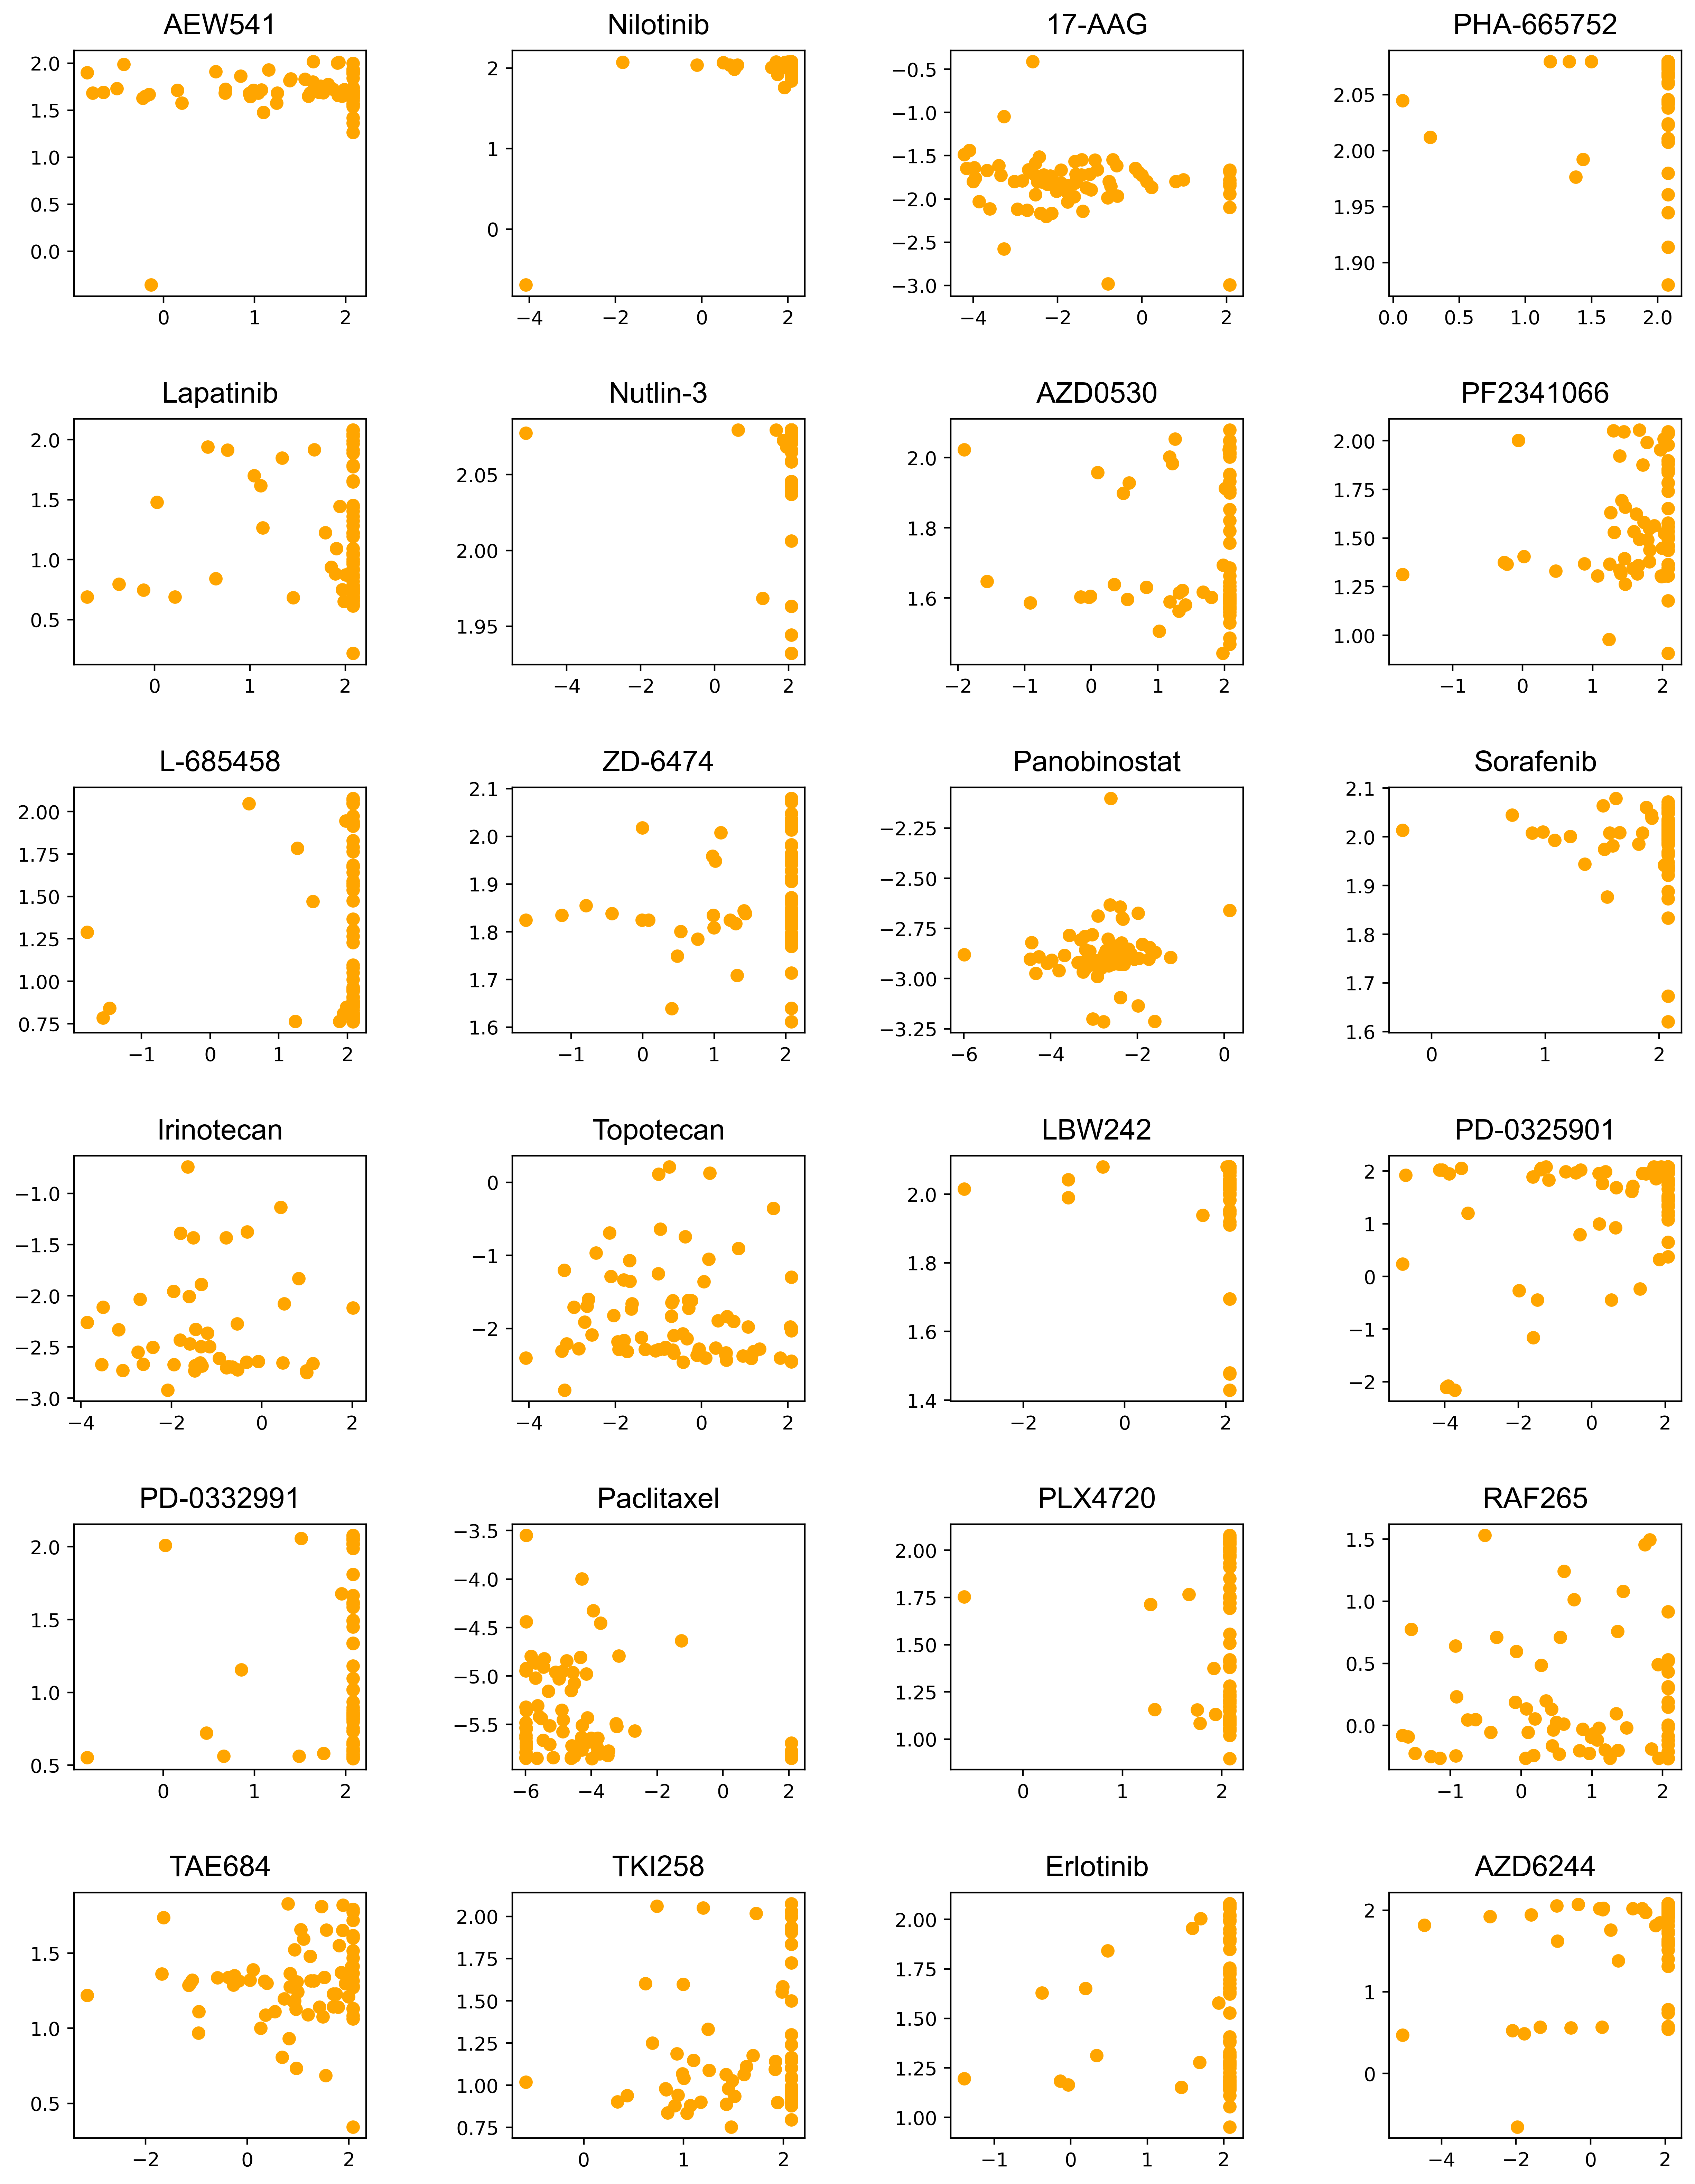

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//MC9K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    rf = RandomForestRegressor(random_state = 84)
    # Train the model on training data
    rf.fit(train_X, train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = rf.predict(test_X)
    predicted_value = predicted_classes
        
        
    import pickle
    import joblib
    joblib.dump(rf, resultdir + '//RF//MC9K_RF_%s.pkl' % dname) 
            
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//RF//predicted_table//MC9K_RF_%s_pred_and_val_result.csv' % dname, index=False)


    
    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//MC9K_single_drug_RF_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.892669,-0.086768
1,Nilotinib,0.808278,0.329846
2,17-AAG,1.821962,-0.133659
3,PHA-665752,0.353885,-0.027746
4,Lapatinib,1.026815,-1.602733
5,Nutlin-3,0.852677,-0.023614
6,AZD0530,0.907496,-0.068480
7,PF2341066,0.689605,-0.033465
8,L-685458,1.090314,-1.089345
9,ZD-6474,0.878621,-0.057973


In [7]:
result.to_csv(resultdir +'//MC9K_RF_24drugs_metrics.csv', index=False)